## **4장 가장 훌륭한 예측선**

**가장 훌륭한 예측선이란?**
* 우선 독립 변수가 하나뿐인 단순 선형 회귀의 예를 공부해 보자
* 성적을 결정하는 여러 요소 중에 ‘공부한 시간’ 한 가지만 놓고 생각해 보자
* 중간고사를 본 4명의 학생에게 각각 공부한 시간을 물어보고 이들의 중간고사 성적을 표 4-1과 같이 정리했다고 하자
  
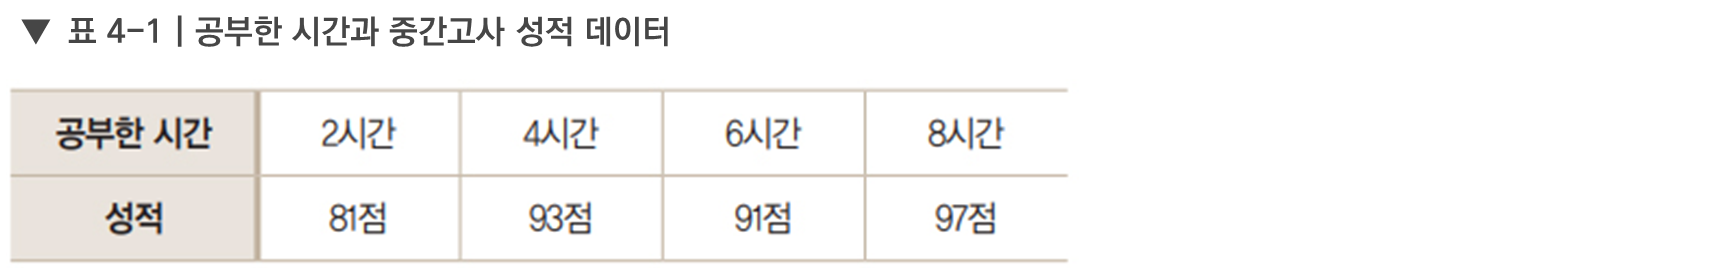


In [ ]:
import numpy as np
X = np.array([2, 4, 6, 8])     # 공부시간
Y = np.array([81, 93, 91, 97]) # 점수

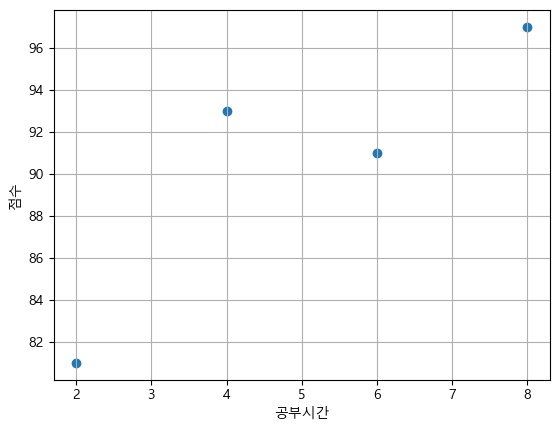

In [ ]:
import matplotlib.pyplot as plt 
  
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.scatter(X, Y)
plt.grid(True)
plt.xlabel('공부시간')
plt.ylabel('점수')
plt.show()

* 이 데이터에서 주어진 점들의 특징을 담은 선은 직선이므로 곧 일차 함수 그래프
* 일차 함수 그래프는 다음과 같은 식으로 표현할 수 있음
  
  **$y = ax + b$**
* 여기서 $x$ 값은 **독립 변수** 이고 $y$ 값은 **종속 변수**
* 지금 주어진 데이터에서의 선형 회귀는 결국 최적의 $a$ 값과 $b$ 값을 찾아내는 작업이라고 할 수 있음


### 최소제곱법(method of least squares)

**기울기 $a$, 절편 $b$ 구하기**  
  
* 정확한 기울기 a와 정확한 y 절편의 값 b를 알아내는 간단한 방법
    -> 최소 제곱법 (method of least squares)  
      
* 최소 제곱법이란 회귀 분석에서 사용되는 표준 방식으로, 실험이나 관찰을 통해 얻은 데이터를 분석하여 미지의 상수를 구할 때 사용되는 공식  
  
* 최소 제곱법 공식을 알고 적용한다면, 일차 함수의 기울기 a와 y 절편 b를 바로 구할 수 있다  
  
  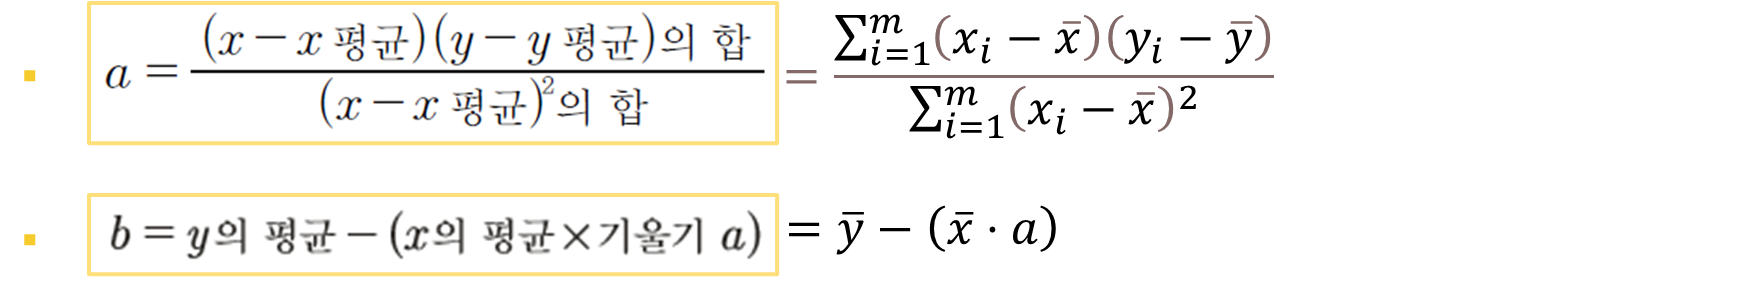

* 독립변수가 하나뿐인 단순 선형회귀의 예


In [ ]:
mX = np.mean(X) # X (공부시간)의 평균
mY = np.mean(Y) # Y (점수)의 평균
mX, mY

(5.0, 90.5)

In [ ]:
## 분모(divisor)
divisor = np.sum((X-mX)**2)
divisor

20.0

In [ ]:
## 분자(divisend)
dividend = np.sum((X - mX) * (Y - mY))
dividend

46.0

In [ ]:
## 기울기 a 구하기
a = dividend / divisor
a

2.3

In [ ]:
## 절편 b 구하기
b = mY - a*mX
b

79.0

In [ ]:
## 검증 ... (X 데이터로 예측하기)
Y_predicted = a * X + b # 예측값
Y_predicted

array([83.6, 88.2, 92.8, 97.4])

In [ ]:
## 실제값과 오차 계산 (편차의 제곱 합)
np.sum((Y_predicted - Y) ** 2)

33.19999999999994

In [ ]:
## 편차 제곱의 평균
np.mean((Y_predicted - Y) ** 2)

8.299999999999985

In [ ]:
#####################################
# 선형회귀 실습 - 최소제곱법
#####################################
import numpy as np

# X 값과 Y 값
X = np.array([2, 4, 6, 8])     # 공부시간
Y = np.array([81, 93, 91, 97]) # 점수

# X와 Y의 평균값
mX = np.mean(X)
mY = np.mean(Y)
print("X의 평균값:", mX)
print("Y의 평균값:", mY)

# 기울기 공식의 분모
divisor = ((X - mX)**2).sum()  # 위와 동일

# 기울기 공식의 분자
dividend = ((X - mX) * (Y - mY)).sum()  # 위의 함수와 동일

print("분모:", divisor)
print("분자:", dividend)

# 기울기와 Y 절편 구하기
a = dividend / divisor
b = mY - (mX*a)

# 출력으로 확인
print("기울기 a =", a)
print("Y 절편 b =", b)

X의 평균값: 5.0
Y의 평균값: 90.5
분모: 20.0
분자: 46.0
기울기 a = 2.3
Y 절편 b = 79.0


## 시각화 해보기

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rc('font', family='Gulim')
mpl.rc('axes', unicode_minus=False)

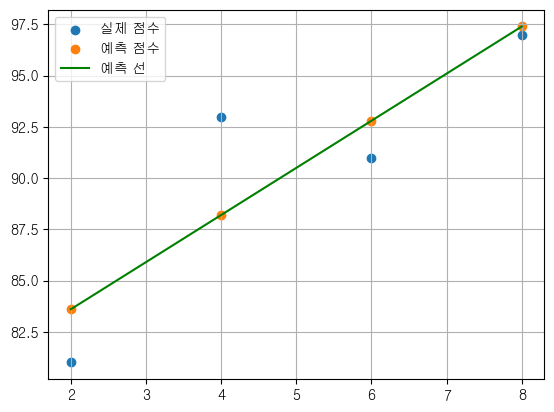

In [ ]:
plt.scatter(X, Y, label='실제 점수')
plt.scatter(X, a * X + b, label='예측 점수')
plt.plot(X, a * X + b, "g", label='예측 선')
plt.grid()
plt.legend()
plt.show()

In [ ]:
a * X + b

### **공부시간 예제 : MSE (Mean Squared Error) 계산하기**

In [ ]:
############################################################
# MSE 계산하기
############################################################
import numpy as np
import pandas as pd

In [ ]:
# 주어진 데이터
X = np.array([2, 4, 6, 8])     # 공부시간
Y = np.array([81, 93, 91, 97]) # 점수

In [ ]:
data = np.array([[2, 81], [4, 93], [6, 91], [8, 97]])
df_score = pd.DataFrame(data, columns=['공부시간', '점수'])
df_score.index.name = '학번'
df_score

,공부시간,점수
학번,,
0,2,81
1,4,93
2,6,91
3,8,97


In [ ]:
df_score.values

array([[ 2, 81],
       [ 4, 93],
       [ 6, 91],
       [ 8, 97]])

In [ ]:
## X, Y 데이터
X = data[:, 0]
Y = data[:, 1]
print(X, Y)

[2 4 6 8] [81 93 91 97]


In [ ]:
# 가상의 a, b (임의의 값) 설정
a, b = 20, 10

# 예측값 계산
Y_hat = a * X + b
print(Y_hat)

[ 50  90 130 170]


In [ ]:
# MSE (Mean Squared Error : 오차제곱평균)
MSE = np.mean((Y_hat - Y)**2)

print('MSE : ', MSE)

MSE :  1955.0


In [ ]:
## scikit learn의 mse함수 사용하여 mse 구하기
from sklearn.metrics import mean_squared_error as mse
mse(Y, Y_hat)

1955.0

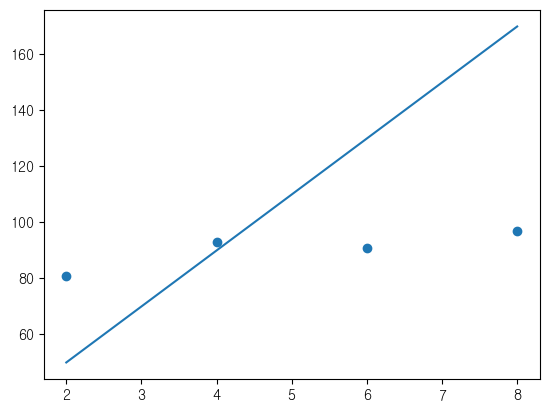

In [ ]:
## 초기값으로 임의의 선 긋기
import matplotlib.pyplot as plt
plt.scatter(X, Y)
plt.plot(X, Y_hat)

In [ ]:
X, Y

(array([2, 4, 6, 8]), array([81, 93, 91, 97]))